In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'


In [3]:
import pickle

In [4]:
from tqdm import tqdm_notebook as tqdm

In [5]:
import scipy

import scipy.constants as sc
hbarc = ( sc.hbar * sc.speed_of_light
         / sc.mega / sc.electron_volt / sc.femto )
ainv = 2.194e3 # lattice cutoff in GeV
lat_unit = hbarc/ainv # lattice spacing in fm

mn = 0.602 # mass of N in lattice unit
mpi = 510/ainv # mass of pion in lattice unit

# import data

In [6]:
pot_jk_bin = {}
pot_H0_jk_bin = {}
for src in ['wall', 'exp']:
    with open(f'../data/pot_jk_1s0_nn_L48_{src}.pkl', 'rb') as fin:
        _, rs, pot_jk_bin[src] = pickle.load(fin)
    with open(f'../data/pot_H0term_jk_1s0_nn_L48_{src}.pkl', 'rb') as fin:
        _, rs, pot_H0_jk_bin[src] = pickle.load(fin)

In [7]:
pot_jk_bin['wall'][13].shape

(20, 2925)

In [8]:
its = list(pot_jk_bin['wall'].keys()) # list of t
bin_num = pot_jk_bin['wall'][its[0]].shape[0] # number of jack-knife samples

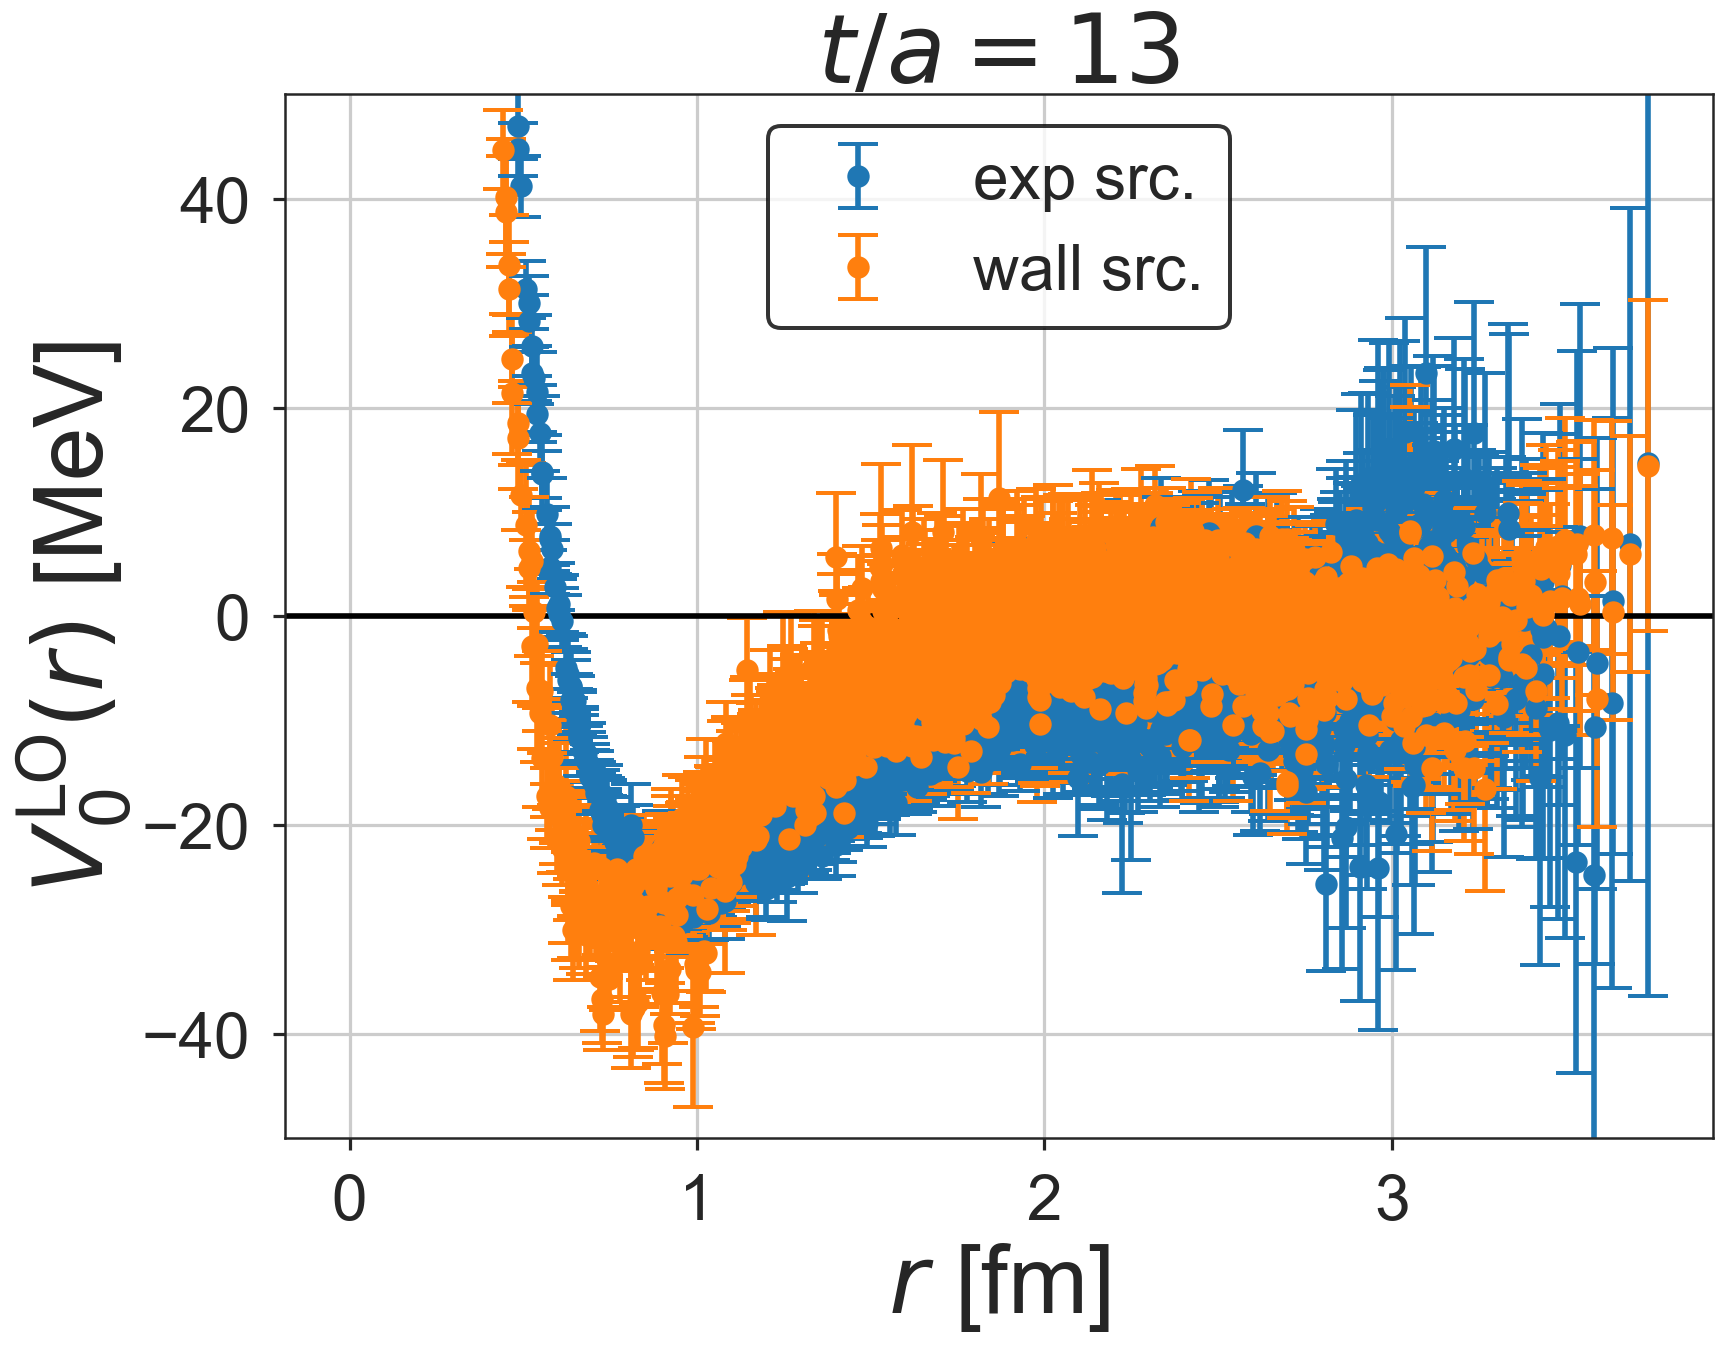

In [9]:
it = 13
fig, ax = plt.subplots()
for src, src_lbl in zip(['exp', 'wall'], ['smeared', 'wall']):
    ys_jk = pot_jk_bin[src][it]
    ax.errorbar(rs*lat_unit, ys_jk.mean(axis=0)*ainv, 
            ys_jk.std(axis=0) * np.sqrt(bin_num - 1)*ainv,
            fmt='o', capsize=10, capthick=2.0, label=f'{src} src.')
ax.set_ylim(-50, 50)
ax.set_title(rf'$t/a = {it}$', size=48)
ax.axhline(0, color='black')
ax.set_xlabel(r'$r$ [fm]', size=48)
ax.set_ylabel(r'$V_0^\mathrm{LO}(r)$ [MeV]', size=48)
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)

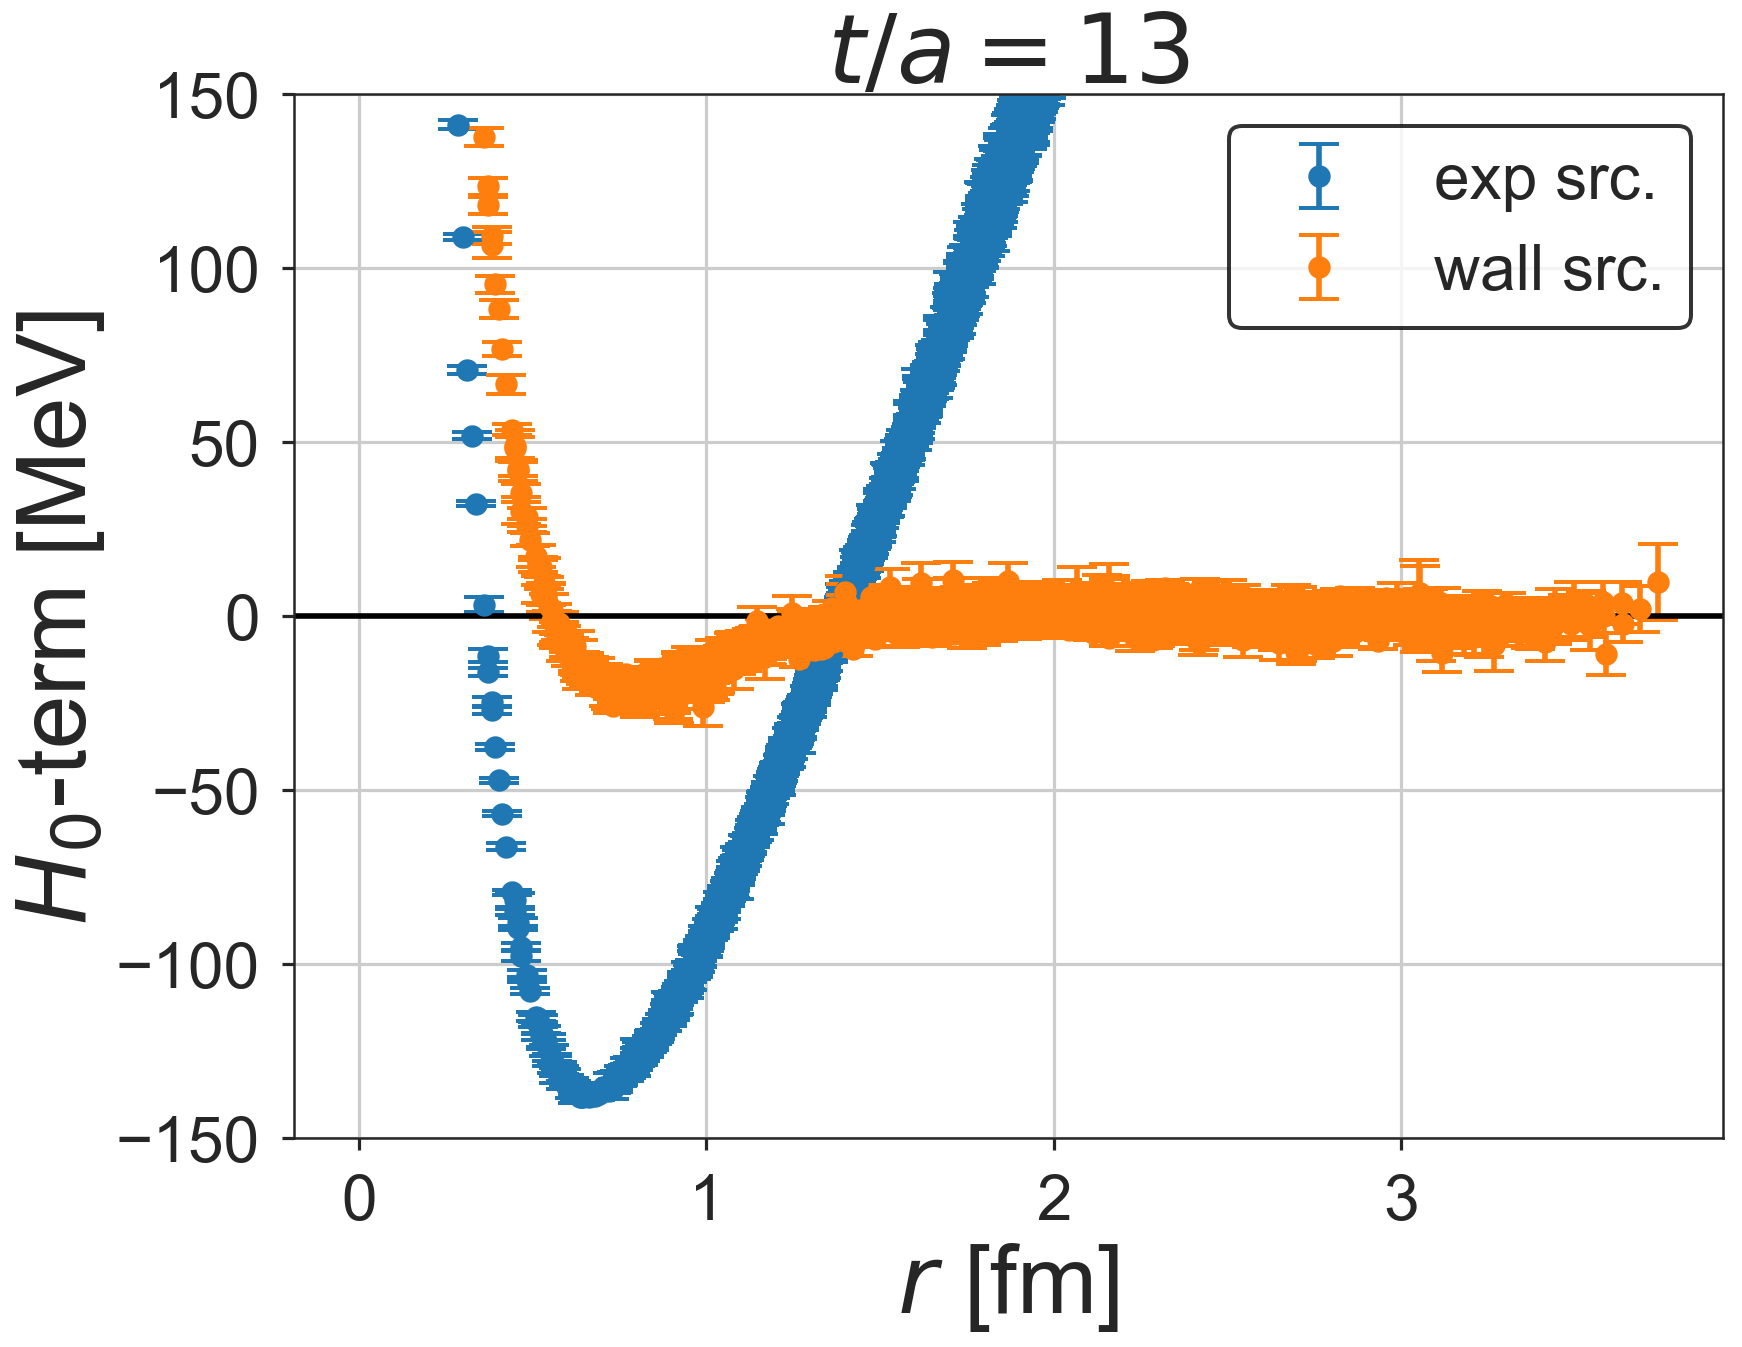

In [10]:
it = 13
fig, ax = plt.subplots()
for src, src_lbl in zip(['exp', 'wall'], ['smeared', 'wall']):
    ys_jk = pot_H0_jk_bin[src][it]
    ax.errorbar(rs*lat_unit, ys_jk.mean(axis=0)*ainv, 
            ys_jk.std(axis=0) * np.sqrt(bin_num - 1)*ainv,
            fmt='o', capsize=10, capthick=2.0, label=f'{src} src.')
ax.set_ylim(-150, 150)
ax.set_title(rf'$t/a = {it}$', size=48)
ax.axhline(0, color='black')
ax.set_xlabel(r'$r$ [fm]', size=48)
ax.set_ylabel(r'$H_0$-term [MeV]', size=48)
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)